In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Coleta das Imagens de Teste

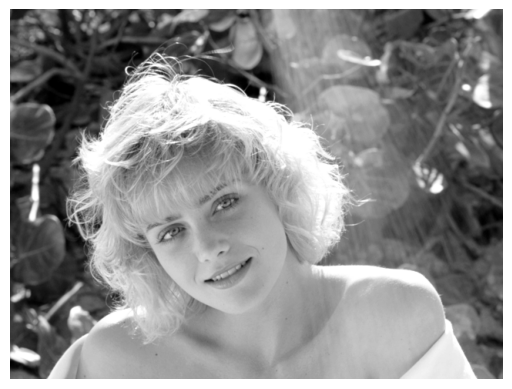

In [ ]:
# Carregar a imagem em modo grayscale
img = cv2.imread('tests\pgm\marcie.ascii.pgm', cv2.IMREAD_GRAYSCALE)

# Exibindo imagem
plt.imshow(img, cmap='gray')
plt.axis('off') 
plt.show()

In [ ]:
# Shape da Imagem
img.shape

(480, 640)

# Implementação JPEG 

## DCT

In [29]:
def dct_transform(img, step=8):

    size = img.shape                    # Pega o tamanho da imagem (altura, largura)
    IDCT = np.zeros(size, dtype=float)  # Cria uma matriz para armazenar a imagem reconstruída
    DCT = np.zeros(size, dtype=float)   # Cria uma matriz para armazenar os coeficientes DCT

    for y in range(0, size[0], step):       # Percorre linhas de 8 em 8
        for x in range(0, size[1], step):   # Percorre colunas de 8 em 8
            dct = cv2.dct(img[y:y+step, x:x+step])   # Aplica DCT 2D no bloco 8x8
            idct = cv2.idct(dct)                     # Aplica IDCT no bloco transformado

            IDCT[y:y+step, x:x+step] = idct   # Salva o bloco reconstruído
            DCT[y:y+step, x:x+step] = dct     # Salva o bloco DCT

    # Desfaz o deslocamento de 128
    img = img + 128  
    IDCT = IDCT + 128

    return DCT, IDCT

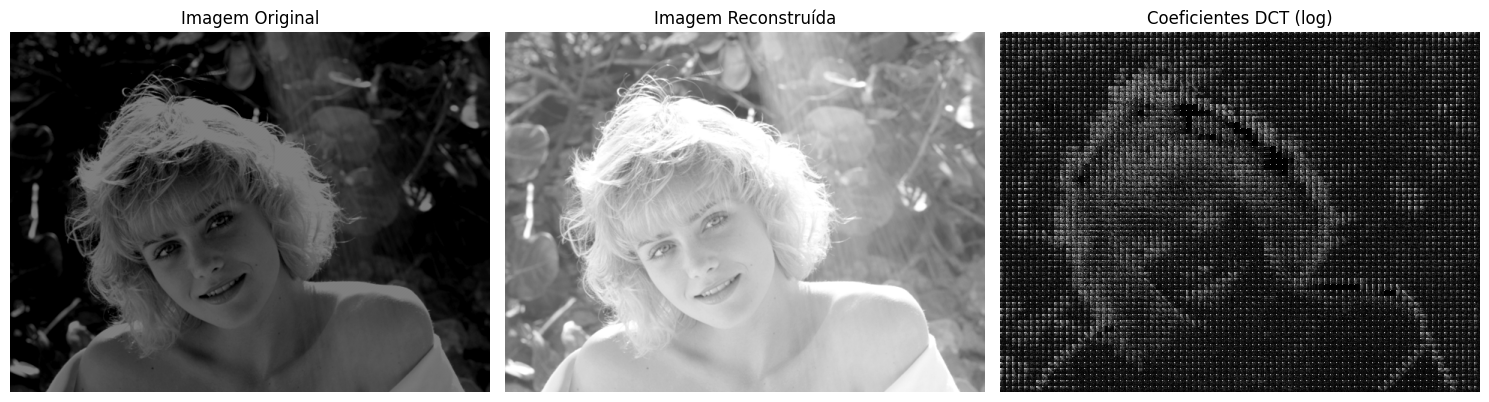

In [ ]:
# Extração da DCT para a imagem
img = img.astype(float)             
img = img - 128                     # Centraliza os valores da imagem em torno de 0
step = 8                            # Define o tamanho do bloco (8x8)

# Realiza Transformada
DCT, IDCT = dct_transform(img, step)

# Visualização
# Imagem Original
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

# Imagem Reconstruída
plt.subplot(1, 3, 2)
plt.imshow(IDCT, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Reconstruída')
plt.axis('off')

# Coeficientes DCT
plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(DCT) + 1), cmap='gray')
plt.title('Coeficientes DCT (log)')
plt.axis('off')

plt.tight_layout()
plt.show()